<a href="https://colab.research.google.com/github/AminTaheri23/Churn-Customers-Prediction/blob/master/AminTaheri_DeepNLP_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instruction
1.   Load a dataset
2.   Creating a model 
3.   Compile the model
4.   Fit the model
5.   Evaluate the model
6.   visualize the process


In [0]:
! wget https://github.com/sharmaroshan/Churn-Modelling-Dataset/blob/master/Churn_Modelling.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [0]:
! ls

Churn_Modelling.csv  sample_data


In [0]:
# preprocessing

import pandas as pd

ourdata = pd.read_csv("Churn_Modelling.csv") 

what_to_drop = ['RowNumber', 'Surname', 'CustomerId',]
ourdata.drop(what_to_drop,  axis=1, inplace=True)

ourdata.Geography.replace(['France', 'Spain', 'Germany'], [0,1,2], inplace=True)
ourdata.Gender.replace(['Female', 'Male'], [0,1], inplace=True)

from keras.utils import to_categorical
ourdata = ourdata.join(pd.DataFrame(to_categorical(ourdata.Geography, num_classes=3),
                              columns = ['France','Spain', 'Germany']))
ourdata = ourdata.join(pd.DataFrame(to_categorical(ourdata.Gender, num_classes=2),
                              columns=['Female', 'Male']))
ourdata.drop(['Gender', 'Geography'], axis=1, inplace=True)


ourdata.Exited.describe()

#reordering Exited column
ourdata = ourdata[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'France', 'Spain',
       'Germany', 'Female', 'Male', 'Exited']]

ourdata.head()
from sklearn.model_selection import train_test_split

x = ourdata.iloc[:, 0:13]
y = ourdata.iloc[:, 13]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train.head()

Using TensorFlow backend.


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Spain,Germany,Female,Male
8155,799,38,2,0.00,2,1,1,59297.34,0.0,1.0,0.0,0.0,1.0
2344,714,49,4,93059.34,1,1,0,7571.51,0.0,0.0,1.0,1.0,0.0
9338,558,58,2,142537.18,1,1,1,88791.83,0.0,0.0,1.0,0.0,1.0
415,626,26,8,0.00,2,0,0,191420.71,0.0,1.0,0.0,0.0,1.0
949,684,48,3,73309.38,1,0,0,21228.34,1.0,0.0,0.0,1.0,0.0


# 1. Build a Model without Normalization

In [0]:
#create a model

import keras 
from keras.models import Model
from keras.layers import Dense, Input
from keras.optimizers import Adam, SGD

inputs = Input(shape=(x_train.shape[1],))
x = Dense(40, activation='relu')(inputs)
y = Dense(40, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(y)

model = Model(inputs=inputs, outputs=predictions)

W0715 09:57:07.044667 140099736930176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 09:57:07.068065 140099736930176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 09:57:07.073822 140099736930176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
# Compile the Model
sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

W0715 09:57:07.143175 140099736930176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
# print summary of your model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                560       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Fit the model
history = model.fit(x_train, y_train,
          epochs=2, batch_size=128, validation_data=(x_test, y_test))



W0715 09:57:07.296270 140099736930176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0715 09:57:07.337880 140099736930176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 8000 samples, validate on 2000 samples
Epoch 1/2
8000/8000 [==============================] - 0s 29us/step - loss: 0.2046 - acc: 0.7954 - val_loss: 0.2000 - val_acc: 0.8000
Epoch 2/2
8000/8000 [==============================] - 0s 11us/step - loss: 0.2046 - acc: 0.7954 - val_loss: 0.2000 - val_acc: 0.8000


In [0]:
# ٍEvaluate the Model
score = model.evaluate(x_test, y_test, batch_size=128)

2000/2000 [==============================] - 0s 8us/step


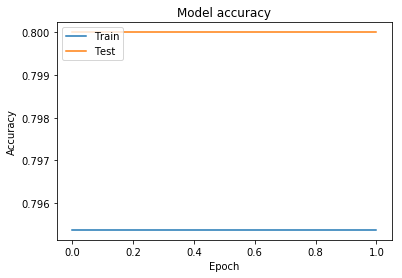

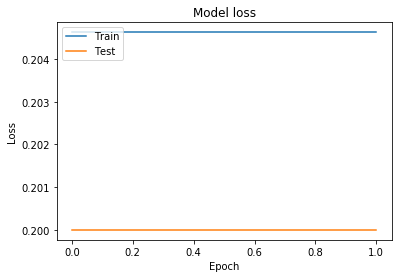

In [0]:
# Visualize the Model
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 2. Build a Model with Normalization 

In [0]:
# Load data set

In [0]:
# Create a Model

#normalizing 

ourNormalData = ourdata.copy()
cols_to_norm = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary']
ourNormalData[cols_to_norm] = ourdata[cols_to_norm].apply(lambda x: (x - x.min())/ (x.max() - x.min()) )

import keras 
from keras.models import Model,Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam, SGD, Adagrad
from keras.losses import binary_crossentropy


model = Sequential()
model.add(Dense(6, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))





W0715 10:07:43.277745 140400502249344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 10:07:43.293449 140400502249344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 10:07:43.296637 140400502249344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
# adam = Adam()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0715 10:07:43.346904 140400502249344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0715 10:07:43.375340 140400502249344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0715 10:07:43.382767 140400502249344 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# print summary of your model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Fit the model

# class_weights = {1: 0.6,
#                  0 : 0.4}

history = model.fit(x_train, y_train,
          epochs=5,
          validation_data=(x_test, y_test))

W0715 10:07:43.584431 140400502249344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 1s 70us/step - loss: 2.7945 - acc: 0.7962 - val_loss: 2.8225 - val_acc: 0.7945
Epoch 2/5
8000/8000 [==============================] - 0s 41us/step - loss: 2.6154 - acc: 0.7967 - val_loss: 2.7513 - val_acc: 0.7945
Epoch 3/5
8000/8000 [==============================] - 0s 41us/step - loss: 2.5965 - acc: 0.7967 - val_loss: 2.7450 - val_acc: 0.7945
Epoch 4/5
8000/8000 [==============================] - 0s 42us/step - loss: 2.5949 - acc: 0.7967 - val_loss: 2.7441 - val_acc: 0.7945
Epoch 5/5
8000/8000 [==============================] - 0s 41us/step - loss: 2.5947 - acc: 0.7967 - val_loss: 2.7440 - val_acc: 0.7945


In [0]:
# ٍEvaluate the Model
score = model.evaluate(x_test, y_test, batch_size=50)

2000/2000 [==============================] - 0s 14us/step


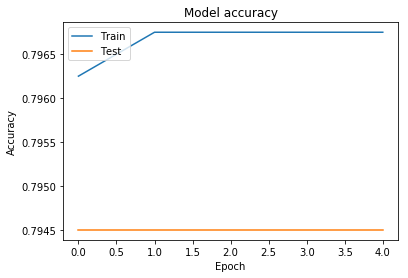

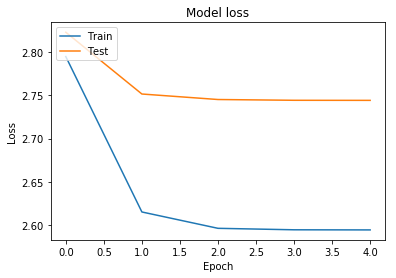

In [0]:
# Visualize the Model
# Visualize the Model
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 3. Build a Model with Normalization L2 Regularization 

In [0]:
# Load data set

In [0]:
# Create a Model

#normalizing 

ourNormalData = ourdata.copy()
cols_to_norm = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary']
ourNormalData[cols_to_norm] = ourdata[cols_to_norm].apply(lambda x: (x - x.min())/ (x.max() - x.min()) )

import keras 
from keras.models import Model,Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam, SGD, Adagrad
from keras.losses import binary_crossentropy
from keras.regularizers import l2

model = Sequential()
model.add(Dense(6, input_dim=13, activation='relu'))
model.add(Dense(6, kernel_regularizer=l2(0.01), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

W0715 10:08:51.106317 140052379453312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 10:08:51.121564 140052379453312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 10:08:51.124713 140052379453312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
# adam = Adam()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0715 10:08:51.181437 140052379453312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0715 10:08:51.211218 140052379453312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0715 10:08:51.218545 140052379453312 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# print summary of your model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Fit the model

# class_weights = {1: 0.6,
#                  0 : 0.4}

history = model.fit(x_train, y_train,
          epochs=5,
          validation_data=(x_test, y_test))

W0715 10:08:51.437037 140052379453312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 1s 74us/step - loss: 8.4390 - acc: 0.4716 - val_loss: 8.0066 - val_acc: 0.4995
Epoch 2/5
8000/8000 [==============================] - 0s 43us/step - loss: 7.5574 - acc: 0.5269 - val_loss: 5.7263 - val_acc: 0.6425
Epoch 3/5
8000/8000 [==============================] - 0s 41us/step - loss: 4.2758 - acc: 0.7337 - val_loss: 3.2573 - val_acc: 0.7985
Epoch 4/5
8000/8000 [==============================] - 0s 41us/step - loss: 3.2946 - acc: 0.7957 - val_loss: 3.2568 - val_acc: 0.7985
Epoch 5/5
8000/8000 [==============================] - 0s 42us/step - loss: 3.2944 - acc: 0.7957 - val_loss: 3.2567 - val_acc: 0.7985


In [0]:
# ٍEvaluate the Model
score = model.evaluate(x_test, y_test, batch_size=50)

2000/2000 [==============================] - 0s 14us/step


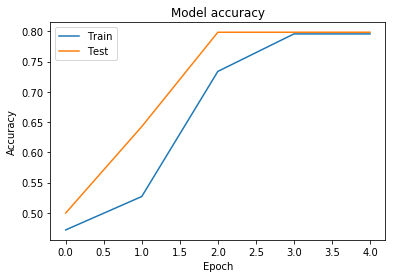

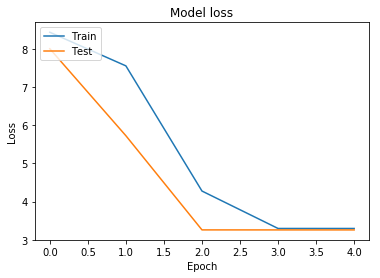

In [0]:
# Visualize the Model
# Visualize the Model
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 4. Build a Model With Normalization and Dropout

In [0]:
# Load data set

In [0]:
# Create a Model

#normalizing 

ourNormalData = ourdata.copy()
cols_to_norm = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary']
ourNormalData[cols_to_norm] = ourdata[cols_to_norm].apply(lambda x: (x - x.min())/ (x.max() - x.min()) )

import keras 
from keras.models import Model,Sequential
from keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam, SGD, Adagrad, RMSprop, Adadelta
from keras.losses import binary_crossentropy
from keras.regularizers import l2

model = Sequential()
model.add(Dense(12 ,input_dim=13, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

W0715 11:24:06.909393 140261786228608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 11:24:06.926891 140261786228608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 11:24:06.934031 140261786228608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0715 11:24:06.965519 140261786228608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0715 11:24:06.979346 

In [0]:
adam = RMSprop(lr = 0.001)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

W0715 11:24:07.037839 140261786228608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0715 11:24:07.045357 140261786228608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0715 11:24:07.052277 140261786228608 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# print summary of your model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                168       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Fit the model

# class_weights = {1: 0.6,
#                  0 : 0.4}

history = model.fit(x_train, y_train,
          epochs=50,
          validation_data=(x_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 1s 71us/step - loss: 4.2033 - acc: 0.7259 - val_loss: 3.3207 - val_acc: 0.7935
Epoch 2/50
8000/8000 [==============================] - 0s 44us/step - loss: 3.9002 - acc: 0.7455 - val_loss: 3.3050 - val_acc: 0.7945
Epoch 3/50
8000/8000 [==============================] - 0s 43us/step - loss: 3.5538 - acc: 0.7660 - val_loss: 3.2988 - val_acc: 0.7950
Epoch 4/50
8000/8000 [==============================] - 0s 43us/step - loss: 3.4696 - acc: 0.7714 - val_loss: 3.2959 - val_acc: 0.7955
Epoch 5/50
8000/8000 [==============================] - 0s 42us/step - loss: 3.6063 - acc: 0.7650 - val_loss: 3.2959 - val_acc: 0.7955
Epoch 6/50
8000/8000 [==============================] - 0s 44us/step - loss: 3.3813 - acc: 0.7752 - val_loss: 3.2959 - val_acc: 0.7955
Epoch 7/50
8000/8000 [==============================] - 0s 42us/step - loss: 3.4444 - acc: 0.7755 - val_loss: 3.2959 - val_acc: 0.7955
Epoch 8

In [0]:
# ٍEvaluate the Model
score = model.evaluate(x_test, y_test, batch_size=50)

2000/2000 [==============================] - 0s 15us/step


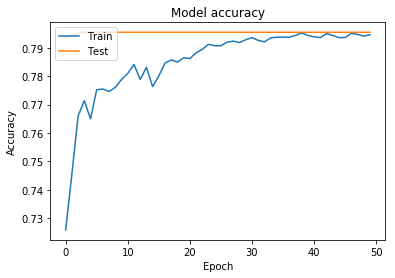

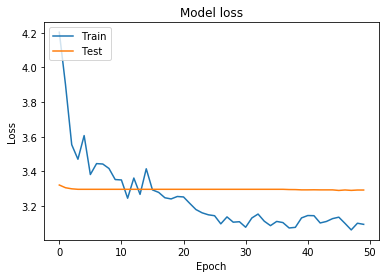

In [0]:
# Visualize the Model
# Visualize the Model
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 5. Try your Best Model 

In [0]:
# Load data set

In [0]:
# Create a Model

#normalizing 

ourNormalData = ourdata.copy()
cols_to_norm = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary']
ourNormalData[cols_to_norm] = ourdata[cols_to_norm].apply(lambda x: (x - x.min())/ (x.max() - x.min()) )

import keras 
from keras.models import Model,Sequential
from keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam, SGD, Adagrad, RMSprop, Adadelta
from keras.losses import binary_crossentropy
from keras.regularizers import l2

model = Sequential()
model.add(Dense(12 ,input_dim=13, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [0]:
rmsprop = RMSprop(lr = 0.001)
model.compile(loss='binary_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

In [0]:
# print summary of your model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                168       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Fit the model

# class_weights = {1: 0.6,
#                  0 : 0.4}

history = model.fit(x_train, y_train,
          epochs=50,
          validation_data=(x_test, y_test))

In [0]:
# ٍEvaluate the Model
score = model.evaluate(x_test, y_test, batch_size=50)

2000/2000 [==============================] - 0s 15us/step


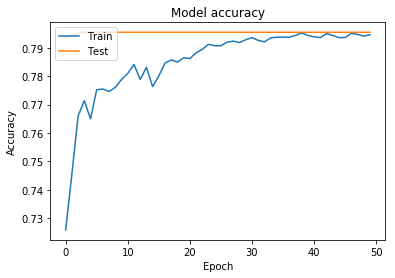

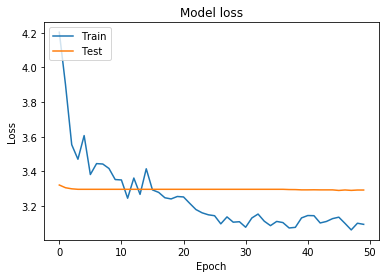

In [0]:
# Visualize the Model
# Visualize the Model
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Your Final Report 
In this part Compare your results from different models. and explain why you have chosen that structure and hyperparameters for your model in part 5.


# My answer:
## introduction: 
in this problem we are predicting if a customer exits the bank if having a certain condition, this is helful to retainig customer loyalty. 

## preprocessing 
the preprocessing is essential for a good accuracy.
we should doing some normalization (scaling in percise) and one-hot-encodeing for some non binary features like gender or country or etc. 
and we split the x from y & train from test in proportion of 70 to 30. 

we are ready to make the model. 

## create a model 
for this dataset by intuittion, a 2 or 3 layer, dense, network wih 10 nurons per layer should be enough. 
we use sigmoid activition for the last layer to get prediction more percise 
the intermediary layers will activate with relu function. 

## fitting the model
by testing lots of optimizers and adjusting and trying different learning rate(and some googeling) i discover that **RMsProp** optimizer with this learning rate is good for binary classification. we use binary cross entropy for loss function because it is good for classification 

50 epochs should be enough for getting optimized accuracy and loss, more epochs is unnecessary due to fluctuation of accuracy in fixed area.  

first i built a model with 3 layers and 64 neurons per each that was a realy dense network, then i decrese the nuerons to an optimal number. 

i even try to balace the y with Class_Weigths to get better accuracy but it didnt do anything special so i just comented it. 

## Visualize 

<a href="https://ibb.co/Db4XtLp"><img src="https://i.ibb.co/KG6ZXmw/Annotation-2019-07-15-175739.jpg" alt="Annotation-2019-07-15-175739" border="0" width="400" height=""></a>